In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('..\\Datasets\\wine_data.csv',usecols=[0,1,2])
df.columns=['ClassLabel','Alcohol','MalicAcid']
df.sample(5)

,ClassLabel,Alcohol,MalicAcid
45,1,14.38,3.59
109,2,11.46,3.74
156,3,12.45,3.03
173,3,13.40,3.91
39,1,13.56,1.71


Text(0.5, 1.0, 'Alcohol')

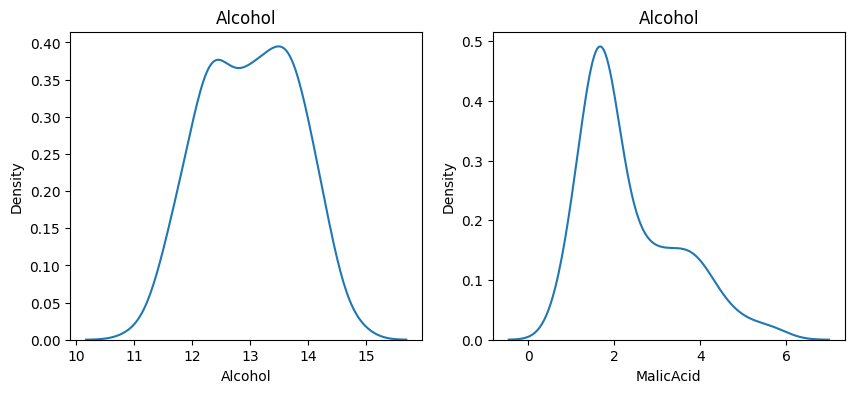

In [21]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,4))
sns.kdeplot(df['Alcohol'],ax=ax1)
ax1.set_title('Alcohol')
sns.kdeplot(df['MalicAcid'],ax=ax2)
ax2.set_title('Alcohol')

<Axes: xlabel='Alcohol', ylabel='MalicAcid'>

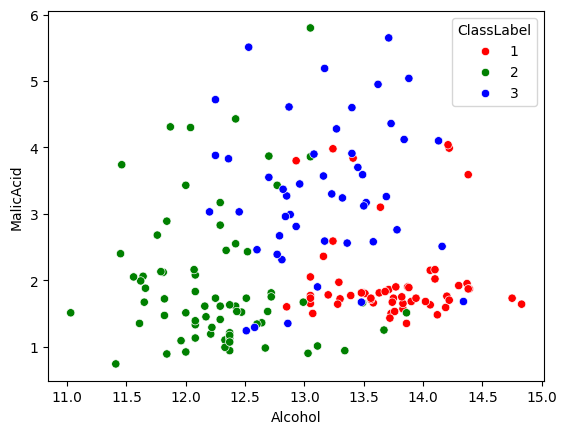

In [22]:
color_palette = {1:'red',2:'green',3:'blue'}
sns.scatterplot(x=df['Alcohol'],y=df['MalicAcid'],hue=df['ClassLabel'],palette=color_palette)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('ClassLabel',axis=1),df['ClassLabel'], test_size=0.3, random_state=0)
X_train.shape,X_test.shape

((123, 2), (54, 2))

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [25]:
np.round(X_train_scaled.describe(),2)

,Alcohol,MalicAcid
count,123.00,123.00
mean,0.52,0.29
std,0.21,0.24
min,0.00,0.00
25%,0.36,0.14
50%,0.54,0.19
75%,0.70,0.45
max,1.00,1.00


Text(0.5, 1.0, 'Before scaling')

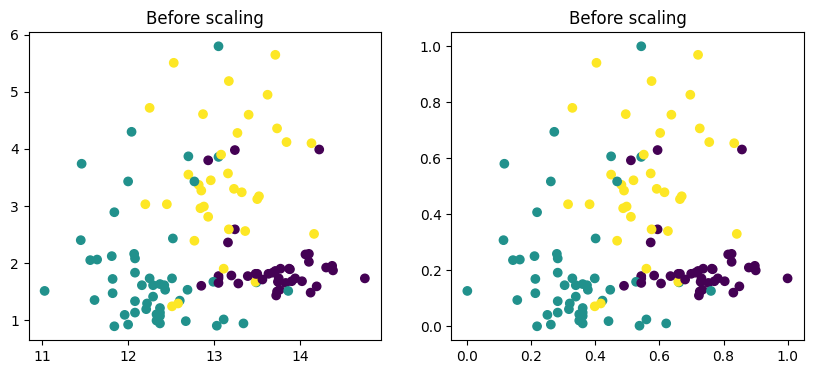

In [26]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,4))
ax1.scatter(X_train['Alcohol'],X_train['MalicAcid'],c=y_train)
ax1.set_title('Before scaling')
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['MalicAcid'],c=y_train)
ax2.set_title('Before scaling')

Text(0.5, 1.0, 'After Scaling')

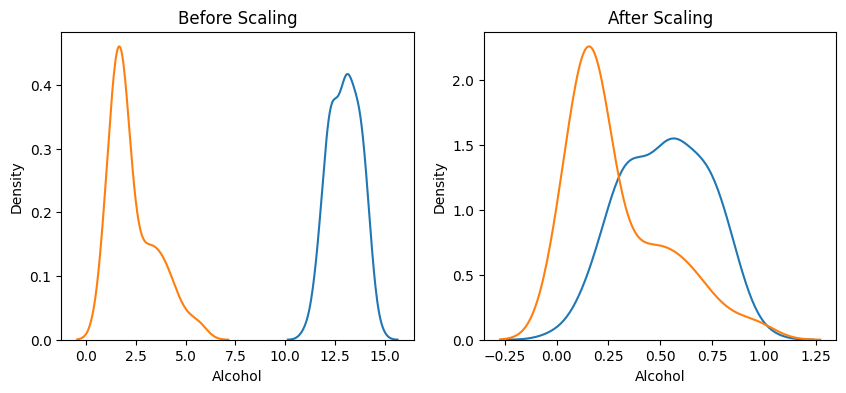

In [27]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,4))
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['MalicAcid'], ax=ax1)
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['MalicAcid'], ax=ax2)
ax2.set_title('After Scaling')